In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

Device is cuda


# Q1)

torch.Size([1, 224, 224])


(-0.5, 223.5, 223.5, -0.5)

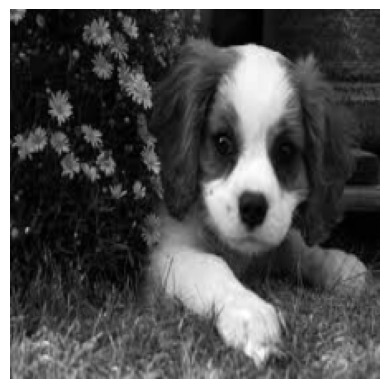

In [16]:
image_path = 'img.jpeg'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image = Image.open(image_path)
image = image.convert('L')

img = transform(image)

print(img.shape)

arr = img.squeeze().numpy()
plt.imshow(arr, cmap = 'gray')
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

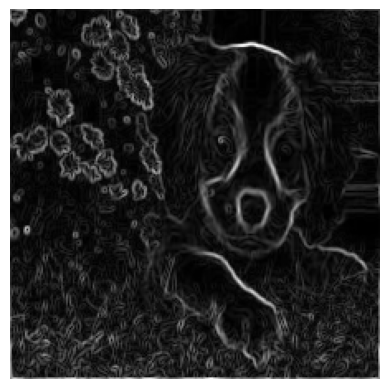

In [17]:
def conv3x3(img, kernel):
    img = img.unsqueeze(0)
    kernel = kernel.unsqueeze(0).unsqueeze(0)
    return F.conv2d(img, kernel, stride=1, padding=1)

kernelX = torch.Tensor([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
kernelY = kernelX.T
outX = conv3x3(img, kernelX)
outY = conv3x3(img, kernelY)

edges = torch.sqrt(outX**2 + outY**2)

edges = torch.squeeze(edges)
plt.imshow(edges.numpy(), cmap='gray')
plt.axis('off')

# Q2)

torch.Size([3, 224, 224])
torch.Size([1, 224, 224])


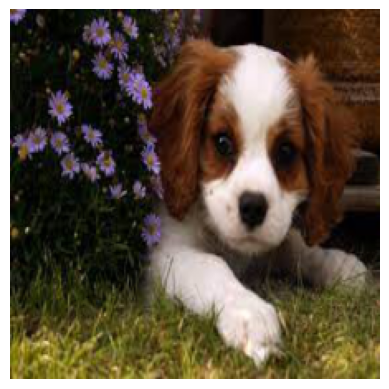

In [18]:
image_path = 'img.jpeg'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image = Image.open(image_path)
gray = image.convert('L')

img = transform(image)
gray = transform(gray)

print(img.shape)

arr = img.squeeze().numpy()
arr = arr.transpose(1, 2, 0)
plt.imshow(arr)
plt.axis('off')

print(gray.shape)

(-0.5, 223.5, 223.5, -0.5)

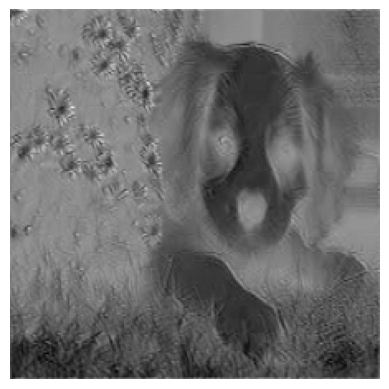

In [19]:
conv3x3 = torch.nn.Conv2d(3, 1, 3, stride=1, padding=1, groups=1)
out = conv3x3(img)

arr = out.squeeze().detach().numpy()
#arr = arr.transpose(1, 2, 0)
plt.imshow(arr, cmap='gray')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

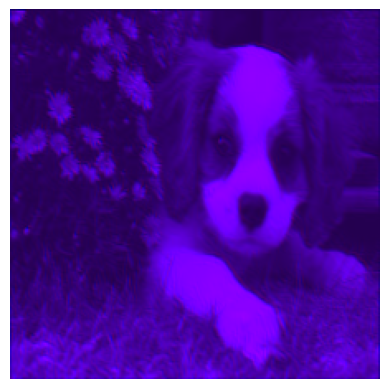

In [20]:
conv3x3 = torch.nn.Conv2d(1, 3, 3, stride=1, padding=1)
out = conv3x3(gray)

arr = out.squeeze().detach().numpy()
arr = arr.transpose(1, 2, 0)
plt.imshow(arr)
plt.axis('off')